## Import Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df.shape

(100000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

## Data Visualization

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<AxesSubplot: xlabel='class', ylabel='count'>

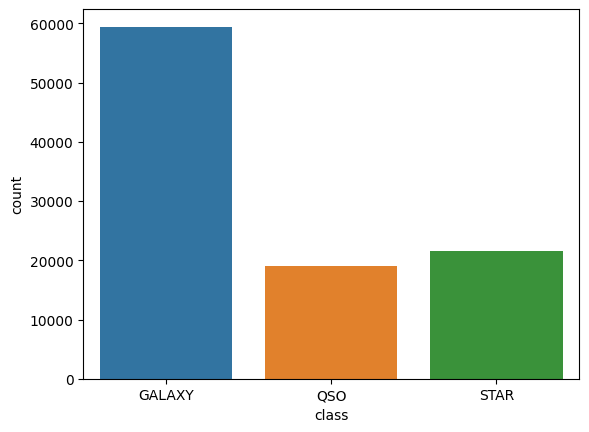

In [6]:
sns.countplot(data=df, x='class')

<AxesSubplot: xlabel='redshift'>

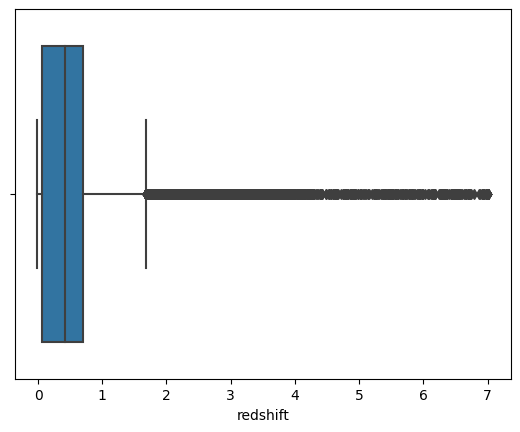

In [7]:
sns.boxplot(data=df, x='redshift')

<AxesSubplot: xlabel='plate'>

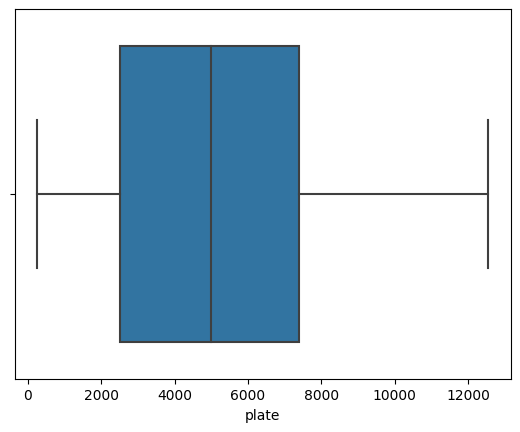

In [8]:
sns.boxplot(data=df, x='plate')

## Clean Data

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import zscore

In [10]:
# Convert categorical variable to numeric
le = LabelEncoder()
le.fit(df['class'])
transform_df = le.transform(df['class'])
df['class'] = transform_df

In [11]:
le.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [12]:
# Drop not important features
df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID'], axis=1, inplace=True)

In [13]:
# Drop outliers
df = df[(np.abs(zscore(df)) < 3).all(axis=1)]
df.head()

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123,6121,56187


In [14]:
df.shape

(97884, 11)

## Machine Learning

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

## Feature Engineering

In [16]:
features = ['u','g','r','i','z','redshift','plate']
X = df[features]
y = df['class']

In [17]:
# Create train, validation, test splits
X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=42)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape

((68518, 7), (14683, 7), (14683, 7))

In [20]:
y_train.shape, y_val.shape, y_test.shape

((68518,), (14683,), (14683,))

## Model Building

In [21]:
# Find best parameters
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'max_iter': [106],
            'penalty': ['l2','none'],
            'solver': ['newton-cg']
        }
    },
    'decision_tree_classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [9],
            'min_samples_leaf': [11, 15, 19],
            'min_samples_split': [2, 3, 5]
        }
    },
    'random_forest_classifer': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [160, 180, 200],
            'max_depth': [70],
            'min_samples_split': [10, 15],
            'min_samples_leaf': [2,3]
        }
    },
    'svc': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100]
        }
    },
    'knc': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': np.arange(5,10),
            'weights': ['uniform', 'distance']
        }
    },
    'gnb': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
        }
    }
}

In [22]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train_scaled, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [23]:
mp_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
mp_df

,model,best_score,best_params
0,logistic_regression,0.961631,"{'max_iter': 106, 'penalty': 'none', 'solver':..."
1,decision_tree_classifier,0.975058,"{'max_depth': 9, 'min_samples_leaf': 15, 'min_..."
2,random_forest_classifer,0.977991,"{'max_depth': 70, 'min_samples_leaf': 2, 'min_..."
3,svc,0.972825,{'C': 100}
4,knc,0.956668,"{'n_neighbors': 6, 'weights': 'distance'}"
5,gnb,0.917554,{'var_smoothing': 1e-05}


In [24]:
scores

[{'model': 'logistic_regression',
  'best_score': 0.9616305189398201,
  'best_params': {'max_iter': 106, 'penalty': 'none', 'solver': 'newton-cg'}},
 {'model': 'decision_tree_classifier',
  'best_score': 0.9750576492872888,
  'best_params': {'max_depth': 9,
   'min_samples_leaf': 15,
   'min_samples_split': 2}},
 {'model': 'random_forest_classifer',
  'best_score': 0.9779911760556849,
  'best_params': {'max_depth': 70,
   'min_samples_leaf': 2,
   'min_samples_split': 15,
   'n_estimators': 180}},
 {'model': 'svc', 'best_score': 0.9728246434398898, 'best_params': {'C': 100}},
 {'model': 'knc',
  'best_score': 0.9566683004795594,
  'best_params': {'n_neighbors': 6, 'weights': 'distance'}},
 {'model': 'gnb',
  'best_score': 0.9175544926570053,
  'best_params': {'var_smoothing': 1e-05}}]

In [25]:
lr_iter = scores[0].get('best_params').get('max_iter')
lr_pen = scores[0].get('best_params').get('penalty')
lr_solv = scores[0].get('best_params').get('solver')

dtc_depth = scores[1].get('best_params').get('max_depth')
dtc_leaf = scores[1].get('best_params').get('min_samples_leaf')
dtc_split = scores[1].get('best_params').get('min_samples_split')

rfc_depth = scores[2].get('best_params').get('max_depth')
rfc_leaf = scores[2].get('best_params').get('min_samples_leaf')
rfc_split = scores[2].get('best_params').get('min_samples_split')
rfc_estimators = scores[2].get('best_params').get('n_estimators')

svc_c = scores[3].get('best_params').get('C')

knc_neighbors = scores[4].get('best_params').get('n_neighbors')
knc_weights = scores[4].get('best_params').get('weights')

gnb_var = scores[5].get('best_params').get('var_smoothing')

## Performance Results

In [26]:
lr = LogisticRegression(max_iter=lr_iter, penalty=lr_pen, solver=lr_solv) 
lr.fit(X_train_scaled, y_train)
lr_val_pred = lr.predict(X_val_scaled)

print(classification_report(y_val, lr_val_pred))
accuracy_score(y_val, lr_val_pred)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8897
           1       0.94      0.87      0.90      2607
           2       0.98      1.00      0.99      3179

    accuracy                           0.96     14683
   macro avg       0.96      0.95      0.95     14683
weighted avg       0.96      0.96      0.96     14683



0.9620649730981407

In [27]:
dtc = DecisionTreeClassifier(max_depth=dtc_depth, min_samples_split=rfc_split, min_samples_leaf=dtc_leaf)
dtc.fit(X_train_scaled, y_train)
dtc_val_pred = dtc.predict(X_val_scaled)

print(classification_report(y_val, dtc_val_pred))
accuracy_score(y_val, dtc_val_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8897
           1       0.96      0.90      0.93      2607
           2       0.99      1.00      1.00      3179

    accuracy                           0.97     14683
   macro avg       0.98      0.96      0.97     14683
weighted avg       0.97      0.97      0.97     14683



0.9747326840563918

In [28]:
rfc = RandomForestClassifier(n_estimators=rfc_estimators, max_depth=rfc_depth, min_samples_split=dtc_split, min_samples_leaf=rfc_leaf)
rfc.fit(X_train_scaled, y_train)
rfc_val_pred = rfc.predict(X_val_scaled)

print(classification_report(y_val, rfc_val_pred))
accuracy_score(y_val, rfc_val_pred)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8897
           1       0.96      0.92      0.94      2607
           2       0.99      1.00      1.00      3179

    accuracy                           0.98     14683
   macro avg       0.98      0.97      0.97     14683
weighted avg       0.98      0.98      0.98     14683



0.9782741946468705

In [29]:
svc = SVC(C=svc_c)
svc.fit(X_train_scaled, y_train)
svc_val_pred = svc.predict(X_val_scaled)

print(classification_report(y_val, svc_val_pred))
accuracy_score(y_val, svc_val_pred)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8897
           1       0.97      0.92      0.94      2607
           2       0.97      1.00      0.99      3179

    accuracy                           0.97     14683
   macro avg       0.97      0.97      0.97     14683
weighted avg       0.97      0.97      0.97     14683



0.9730300347340461

In [30]:
knc = KNeighborsClassifier(n_neighbors=knc_neighbors, weights=knc_weights)
knc.fit(X_train_scaled, y_train)
knc_val_pred = knc.predict(X_val_scaled)

print(classification_report(y_val, knc_val_pred))
accuracy_score(y_val, knc_val_pred)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8897
           1       0.96      0.92      0.94      2607
           2       0.94      0.98      0.96      3179

    accuracy                           0.96     14683
   macro avg       0.96      0.95      0.95     14683
weighted avg       0.96      0.96      0.96     14683



0.9599536879384322

In [31]:
gnb = GaussianNB(var_smoothing=gnb_var)
gnb.fit(X_train_scaled, y_train)
gnb_val_pred = gnb.predict(X_val_scaled)

print(classification_report(y_val, gnb_val_pred))
accuracy_score(y_val, gnb_val_pred)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      8897
           1       0.74      0.88      0.80      2607
           2       0.98      1.00      0.99      3179

    accuracy                           0.92     14683
   macro avg       0.89      0.93      0.91     14683
weighted avg       0.92      0.92      0.92     14683



0.9172512429340053

In [32]:
dtc_test_pred = dtc.predict(X_test_scaled)
accuracy_score(y_test, dtc_test_pred)

0.9763672274058435

In [33]:
rfc_test_pred = rfc.predict(X_test_scaled)
accuracy_score(y_test, rfc_test_pred)

0.9802492678607914

In [34]:
svc_test_pred = svc.predict(X_test_scaled)
accuracy_score(y_test, svc_test_pred)

0.9745964721106041

### Best Model: RandomForestClassifier()

In [35]:
scores[2].get('best_params')

{'max_depth': 70,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 180}